In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

## Get results and tidy dataset

In [21]:
df = pd.read_csv('data/results.csv', usecols=['title', 'year', 'source', 'decision', 'approach', 'category', 'model', 'preprocessing', 'skill', 'evaluation', 'eval_dataset'])
df = df[df.decision.str.contains('Include')]
df.head()

,year,title,source,decision,approach,category,model,preprocessing,skill,evaluation,eval_dataset
9,2014,A system to grade computer programming skills ...,Backward,Include,Supervised,Traditional,Ridge Regression and others,"Convert to AST, CFG and DDG",Correctness,CV and Pearson Correlation between models,Internal
10,2014,Feature engineering for clustering student sol...,Backward,Include,Unsupervised,Traditional,k-Means,"Extract features, convert to AST",Correctness,"Compared to human, AMI",Internal
11,2015,Learning Program Embeddings to Propagate Feedb...,Backward,Include,Supervised,Neural,Encoder/Decoder for embedding and RNN for pred...,Convert to AST,Correctness and readability,"Compare to baselines, unit tests, Bag of Trees...",Hour of Code
12,2016,Question independent grading using machine lea...,SLR,Include,Supervised,Traditional,LASSO,"Convert to Grammar, Build ‘good set’ using uni...",Correctness,"Human, other models",Automata
13,2017,Automatic extraction of AST patterns for debug...,SLR,Include,Supervised,Traditional,"Random Forest, Majority Classifer","Convert to AST, Build good set using unit tests",Feedback on correctness,Accuracy and output quality,Internal


In [14]:
df.dtypes

year              int64
title            object
source           object
decision         object
approach         object
category         object
model            object
preprocessing    object
skill            object
evaluation       object
eval_dataset     object
dtype: object

## Results
### Years Published

In [22]:
count_years = df.year.value_counts().reset_index().rename(columns={'index': 'year', 'year': 'no_published'})
count_years.head()

,year,no_published
0,2019,7
1,2018,3
2,2014,2
3,2017,2
4,2021,2


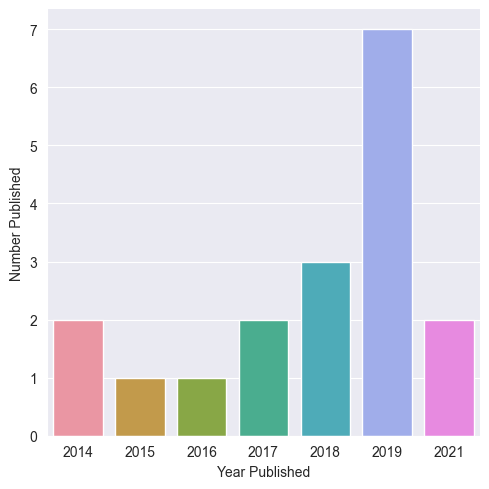

In [24]:
years_plt = sns.catplot(count_years, kind='bar', x='year', y='no_published')
years_plt.set(xlabel='Year Published', ylabel='Number Published')
plt.savefig('plots/years_published.pdf')

## Approach

In [29]:
approach = df.approach.value_counts().reset_index()
approach.columns = ["approach", 'no_papers']
approach['proportion'] = (approach.no_papers / approach.no_papers.sum()) * 100
approach

,approach,no_papers,proportion
0,Supervised,14,77.777778
1,Unsupervised,3,16.666667
2,Semi-Supervised,1,5.555556


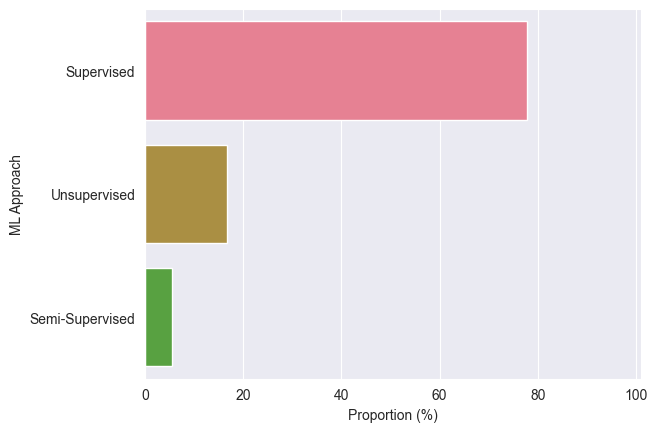

In [30]:
ax_type = sns.barplot(approach, y='approach', x='proportion')
ax_type.set(xlabel = 'Proportion (%)', ylabel='ML Approach')
plt.xlim([0, 101])
plt.savefig('plots/approach.pdf', bbox_inches='tight')

## Category

In [42]:
category = df.category.value_counts().reset_index()
category.columns = ["category", 'no_papers']
category['proportion'] = (category.no_papers / category.no_papers.sum()) * 100
category

,category,no_papers,proportion
0,Neural,10,55.555556
1,Traditional,6,33.333333
2,Both,1,5.555556
3,Neural and Agent-Based,1,5.555556


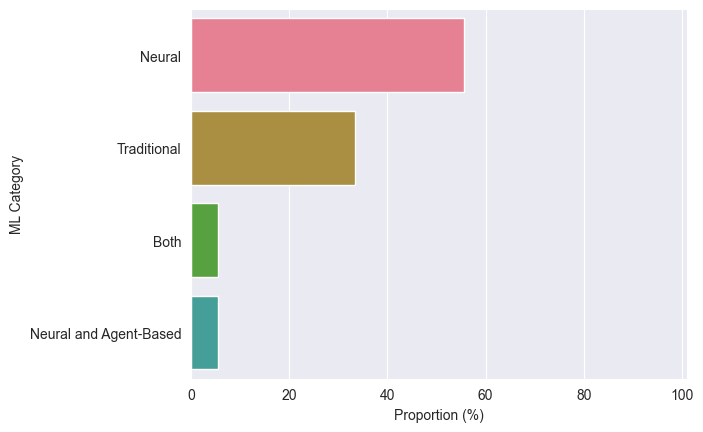

In [43]:
ax_category = sns.barplot(category, y='category', x='proportion')
ax_category.set(xlabel = 'Proportion (%)', ylabel='ML Category')
plt.xlim([0, 101])
plt.savefig('plots/category.pdf', bbox_inches='tight')